In [1]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')

In [2]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

In [25]:
gamma = 0.9

def eval_policy(policy, P, nA, nS, max_iter=10000, epsilon=1e-6):
    V = np.zeros(nS)
    for i in range(max_iter):
        new_V = np.zeros(nS)
        for s in range(nS):
            for prob, next_s, reward, terminal in P[s][policy[s]]:
                new_V[s] += prob * (reward + gamma * V[next_s])
        if np.max(np.abs(new_V-V)) < epsilon:
            break
        V = new_V
    return new_V

def policy_iter(V, policy, P, nA, nS):
    new_policy = [0]*nS
    for s in range(nS):
        new_v = [0]*nA
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                new_v[a] += prob * (reward + gamma * V[next_s])
        new_policy[s] = np.argmax(new_v)
    return new_policy

def l2(a, b):
    s = 0
    for i in range(len(a)):
        s += (a[i]-b[i])**2
    return math.sqrt(s)

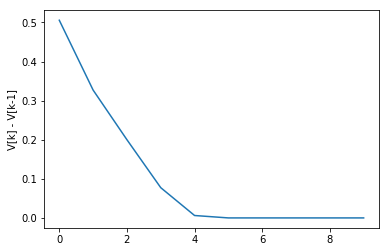

In [33]:
policy = [0]*env.nS
V = eval_policy(policy, env.P, env.nA, env.nS)

n_iter = 10
diff = []
for i in range(n_iter):
    policy = policy_iter(V, policy, env.P, env.nA, env.nS)
    new_V = eval_policy(policy, env.P, env.nA, env.nS)
    diff.append(l2(V, new_V))
    V = new_V

plt.plot(diff)
plt.ylabel('V[k] - V[k-1]')
plt.show()

Value Function [0.06888452 0.06140916 0.07440581 0.05580298 0.09184873 0.
 0.11220608 0.         0.14543165 0.24749378 0.29961536 0.
 0.         0.37993361 0.63901895 0.        ]
Policy [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


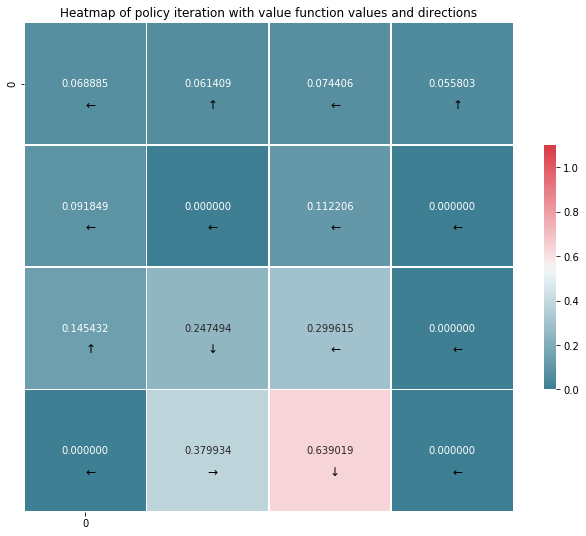


SFFF
FHFH
FFFH
HFFG


In [34]:
fancy_visual(V, policy)
env.render()

In [35]:
def q_func(V, P, nA, nS):
    q = np.zeros((nS, nA))
    for s in range(nS):
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                q[s][a] += prob * (reward + gamma * V[next_s])
    return q

print('Optimal Q function')
q_func(V, env.P, env.nA, env.nS)

Optimal Q function


array([[0.06888533, 0.06664272, 0.06664272, 0.05975346],
       [0.0390881 , 0.0429871 , 0.04074449, 0.06140985],
       [0.07440632, 0.06882547, 0.07272446, 0.05748539],
       [0.03906264, 0.03906264, 0.03348179, 0.05580353],
       [0.09184947, 0.07118411, 0.06429485, 0.04821997],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11220635, 0.08988461, 0.11220635, 0.02232174],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07118411, 0.11787763, 0.10180275, 0.14543225],
       [0.15760958, 0.24749419, 0.20386469, 0.1335141 ],
       [0.29961565, 0.26595382, 0.22536751, 0.10790996],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18822822, 0.30568577, 0.3799339 , 0.26595382],
       [0.39557038, 0.6390191 , 0.61492363, 0.53719803],
       [0.        , 0.        , 0.        , 0.        ]])